# ImageDataGenerator with a Validation Set

In [69]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab import files



In [55]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-11-28 04:21:59--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.217.15.112, 142.251.45.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.2’

horse-or-human.zip. 100%[===================>] 142.65M   171MB/s    in 0.8s    

2022-11-28 04:22:00 (171 MB/s) - ‘horse-or-human.zip.2’ saved [149574867/149574867]

--2022-11-28 04:22:00--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.217.15.112, 142.251.45.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148018

In [56]:
# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [57]:
# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse35-8.png', 'horse39-4.png', 'horse01-5.png', 'horse42-1.png', 'horse46-6.png', 'horse20-0.png', 'horse42-2.png', 'horse17-1.png', 'horse23-3.png', 'horse37-0.png']
TRAIN SET HUMANS: ['human01-24.png', 'human07-05.png', 'human14-23.png', 'human16-22.png', 'human08-01.png', 'human01-14.png', 'human02-16.png', 'human16-12.png', 'human12-11.png', 'human07-17.png']
VAL SET HORSES: ['horse1-170.png', 'horse6-403.png', 'horse3-484.png', 'horse2-112.png', 'horse2-544.png', 'horse1-484.png', 'horse5-103.png', 'horse5-164.png', 'horse1-000.png', 'horse2-596.png']
VAL SET HUMANS: ['valhuman04-03.png', 'valhuman02-15.png', 'valhuman02-12.png', 'valhuman03-18.png', 'valhuman05-06.png', 'valhuman05-04.png', 'valhuman04-12.png', 'valhuman02-07.png', 'valhuman05-25.png', 'valhuman01-19.png']


In [58]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


### Building a Small Model from Scratch

In [59]:
## set seed so that model has same 'common ground' (it node's weight and bias are the same value on each creation)
tf.random.set_seed(10)


model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 35, 35, 64)      

In [60]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### data preprocessing

In [61]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [62]:
batch_size=32
print('train generator batch size:',train_generator.batch_size)
print('validation generator batch size:',validation_generator.batch_size)

print('train generator size:',len(train_generator.labels))
print('validation generator size:',len(validation_generator.labels))

train generator batch size: 128
validation generator batch size: 32
train generator size: 1027
validation generator size: 256


In [63]:
train_steps_per_epoch = len(train_generator.labels)/train_generator.batch_size
validation_steps_per_epoch = len(validation_generator.labels)/validation_generator.batch_size

print('train_steps_per_epoch:', train_steps_per_epoch )

print('validation_steps_per_epoch:', validation_steps_per_epoch )

train_steps_per_epoch: 8.0234375
validation_steps_per_epoch: 8.0


### Training

In [64]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 9s 939ms/step - loss: 0.6951 - accuracy: 0.5117 - val_loss: 0.3310 - val_accuracy: 0.8867
Epoch 2/15
8/8 [==============================] - 7s 879ms/step - loss: 0.6944 - accuracy: 0.6841 - val_loss: 0.6996 - val_accuracy: 0.7109
Epoch 3/15
8/8 [==============================] - 7s 879ms/step - loss: 0.5691 - accuracy: 0.7631 - val_loss: 0.4642 - val_accuracy: 0.8867
Epoch 4/15
8/8 [==============================] - 7s 875ms/step - loss: 0.3170 - accuracy: 0.8676 - val_loss: 1.7376 - val_accuracy: 0.7734
Epoch 5/15
8/8 [==============================] - 7s 873ms/step - loss: 0.2868 - accuracy: 0.8865 - val_loss: 1.3613 - val_accuracy: 0.8242
Epoch 6/15
8/8 [==============================] - 7s 877ms/step - loss: 0.2327 - accuracy: 0.8977 - val_loss: 0.6932 - val_accuracy: 0.8828
Epoch 7/15
8/8 [==============================] - 7s 880ms/step - loss: 0.6124 - accuracy: 0.8621 - val_loss: 2.4402 - val_accuracy: 0.6836
Epoch 8/15
8/8 [====

In [65]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [66]:
def plot_history(history):

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  #plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()


  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  #plt.plot(history.history['val_sparse_categorical_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

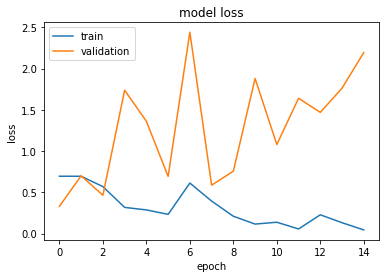

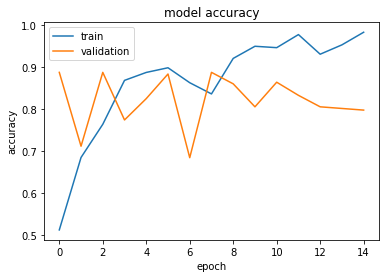

In [67]:
plot_history(history)

Saving lady_green1.jpg to lady_green1.jpg
1/1 [==============================] - 0s 16ms/step
[8.480389e-06]
lady_green1.jpg is a horse


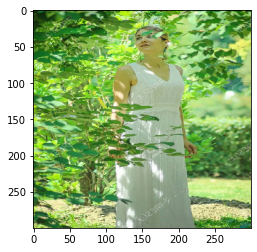

In [73]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
  plt.imshow(img) 

Saving lady_green2.jpg to lady_green2.jpg
1/1 [==============================] - 0s 16ms/step
[1.1797279e-06]
lady_green2.jpg is a horse


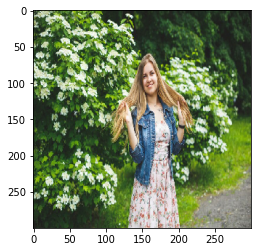

In [74]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
  plt.imshow(img) 

Saving lady_grren3.jpg to lady_grren3.jpg
1/1 [==============================] - 0s 17ms/step
[1.397904e-05]
lady_grren3.jpg is a horse


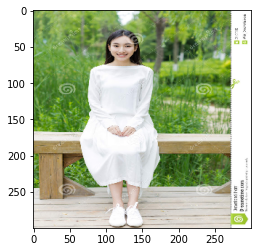

In [75]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
  plt.imshow(img) 

Saving horsesrunningbeach_2.jpg to horsesrunningbeach_2.jpg
1/1 [==============================] - 0s 16ms/step
[0.98125595]
horsesrunningbeach_2.jpg is a human


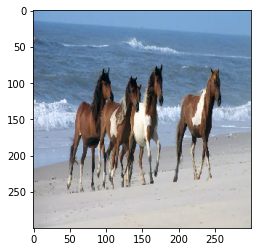

In [76]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
  plt.imshow(img) 

Saving horsebeach.jpg to horsebeach.jpg
1/1 [==============================] - 0s 18ms/step
[0.99999976]
horsebeach.jpg is a human


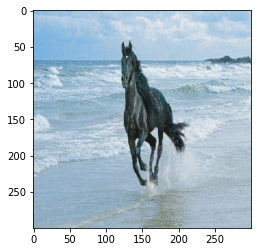

In [77]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
  plt.imshow(img) 

### bonus for step per epoch

In [87]:
## set seed so that model has same 'common ground' (it node's weight and bias are the same value on each creation)
tf.random.set_seed(10)


model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [88]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [83]:
# change steps per epoch

history = model.fit(
      train_generator,
      steps_per_epoch=18,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=18)

Epoch 1/15
 9/18 [==============>...............] - ETA: 7s - loss: 0.7803 - accuracy: 0.5472

18/18 [==============================] - 9s 479ms/step - loss: 0.7803 - accuracy: 0.5472 - val_loss: 0.4273 - val_accuracy: 0.8750


if we make steps_per_epoch exceeding number of batches, training process would stop

In [89]:
# change steps per epoch

history = model.fit(
      train_generator,
      steps_per_epoch=4,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=4)

Epoch 1/15
4/4 [==============================] - 6s 1s/step - loss: 1.0704 - accuracy: 0.4883 - val_loss: 0.6725 - val_accuracy: 0.5078
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6998 - accuracy: 0.4961 - val_loss: 0.5669 - val_accuracy: 0.8984
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6572 - accuracy: 0.6305 - val_loss: 0.5234 - val_accuracy: 0.8203
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.7444 - accuracy: 0.7988 - val_loss: 0.5348 - val_accuracy: 0.9062
Epoch 5/15
4/4 [==============================] - 3s 818ms/step - loss: 0.5917 - accuracy: 0.8010 - val_loss: 3.1784 - val_accuracy: 0.4844
Epoch 6/15
4/4 [==============================] - 4s 826ms/step - loss: 1.2817 - accuracy: 0.5917 - val_loss: 0.4502 - val_accuracy: 0.8672
Epoch 7/15
4/4 [==============================] - 3s 814ms/step - loss: 0.2874 - accuracy: 0.8811 - val_loss: 0.2664 - val_accuracy: 0.9219
Epoch 8/15
4/4 [================

low steps per epoch then the model drop in its performance